In [383]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [385]:
# json 파일 다루기
import json

In [386]:
# 파일 존재 여부 확인용
import os

In [387]:
import matplotlib.pyplot as plt

# 변수 목록

## 고정 변수

In [388]:
from_dir_name = '/content/drive/MyDrive/[perst]데이터셋/Musinsa Data/man'
dest_dir_name = '/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model'

In [389]:
kor_label_name = ['고프코어', '골프', '댄디', '로맨틱', '미니멀', '비즈니스캐주얼', '스트릿', '스포티', '시크', '아메카지', '캐주얼']
eng_label_name = ['Gofcore', 'Golf', 'Dandy', 'Romantic', 'Minimal', 'Business-Casual', 'Street', 'Sporty', 'Chic', 'Amekaji', 'Casual']

## 폴더마다 변경되는 변수

In [532]:
label_num = 10
print(kor_label_name[label_num])
print(eng_label_name[label_num])

캐주얼
Casual


In [533]:
ori_img_dir_name = from_dir_name + '/' + kor_label_name[label_num] # 원본 이미지 파일이 존재하는 디렉토리명

proc_img_dir_name = dest_dir_name + "/Dataset/Musinsa_Dataset/Original/Male/Image/" + eng_label_name[label_num] # 샘플링된 이미지를 저장할 디렉토리명
proc_json_dir_name = dest_dir_name + "/Dataset/Musinsa_Dataset/Original/Male/Json/" + eng_label_name[label_num] # 샘플링된 json 파일을 저장할 디렉토리명

In [534]:
print(ori_img_dir_name)
print(proc_img_dir_name)
print(proc_json_dir_name)

/content/drive/MyDrive/[perst]데이터셋/Musinsa Data/man/캐주얼
/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model/Dataset/Musinsa_Dataset/Original/Male/Image/Casual
/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model/Dataset/Musinsa_Dataset/Original/Male/Json/Casual


In [535]:
print(os.path.isdir(ori_img_dir_name))
print(os.path.isdir(proc_img_dir_name))
print(os.path.isdir(proc_json_dir_name))

True
True
True


# 데이터 불러오기

## 파일 이름 불러오기

In [536]:
ori_img_name_list = os.listdir(ori_img_dir_name)
print("Complete")

Complete


In [537]:
len(ori_img_name_list)

2079

In [538]:
# 이미지 개수 보고 좌우반전 여부 결정
# 기준은 1000개로 하자
flip_on = False

## 분할실행용 코드

In [598]:
# 최초실행 또는 커널이 꺼질때를 대비한 수동저장

end_read_point = 1999 # 직전까지 읽어왔던 최종 파일의 숫자. 리스트 인덱스니까 처음에는 -1
end_save_point = 2000 # 직전까지 저장했던 최종 파일의 숫자

In [610]:
print("End Read Point: " + str(end_read_point))
print("End Save Point: " + str(end_save_point))

End Read Point: 2078
End Save Point: 2079


In [599]:
start_read_point = end_read_point + 1

read_file_size = 500 # 한번에 읽어들일 파일 사이즈

start_save_point = end_save_point + 1

In [600]:
print("End Read Point: " + str(end_read_point))
print("Start Read Point : " + str(start_read_point))
print()
print("Read File Size: " + str(read_file_size))
print()
print("End Save Point: " + str(end_save_point))
print("Start Save Point : " + str(start_save_point))

End Read Point: 1999
Start Read Point : 2000

Read File Size: 500

End Save Point: 2000
Start Save Point : 2001


## 이미지 목록 불러오기

In [601]:
ori_img_list = []
json_list = []

for i in range(start_read_point, len(ori_img_name_list)):
    if len(ori_img_list) == read_file_size:
        break


    file_name = ori_img_dir_name + "/" + ori_img_name_list[i]

    if not os.path.isfile(file_name): # 해당 파일명이 디렉토리에 존재하는지 체크
        continue # 없으면 건너뛰기

    # 파일이 존재하면
    ori_img_file = cv2.imread(file_name)

    if ori_img_file is None: # 파일 불러오기 실패
        print(file_name + " 파일 불러오기 실패")
        break
    else: # 파일 불러오기 성공
        end_read_point = i

    ori_img_list.append(ori_img_file)


    # 계절 정보 추가
    if 'spring' in file_name:
      season = 'Spring'
    elif 'summer' in file_name:
      season = 'Summer'
    elif 'autumn' in file_name:
      season = 'Autumn'
    elif 'winter' in file_name:
      season = 'Winter'
    else:
      season = 'None'

    tmp_dict = {}
    tmp_dict['Season'] = season
    tmp_dict['Labeling'] = eng_label_name[label_num]
    json_list.append(tmp_dict)

    if (len(ori_img_list)%100) == 0: # 진행도 확인용
        print(str(len(ori_img_list)) + "개 이미지 파일 읽어오기 완료")


# 다 끝나면
print()
print(str(end_read_point+1) + "번째 이미지까지 파일 읽어오기 완료")


2079번째 이미지까지 파일 읽어오기 완료


In [602]:
len(ori_img_list)

79

In [603]:
len(json_list)

79

# 계절 정보 통계

In [589]:
# season_list.index('None')

In [590]:
# ori_img_name_list[1130]

In [604]:
season_list = []

for json_dict in json_list:
    season_list.append(json_dict['Season'])

print("Complete")

Complete


In [605]:
season_count = []

season_count.append(season_list.count('Spring'))
season_count.append(season_list.count('Summer'))
season_count.append(season_list.count('Autumn'))
season_count.append(season_list.count('Winter'))
season_count.append(season_list.count('None'))

print(season_count)

[0, 0, 0, 79, 0]


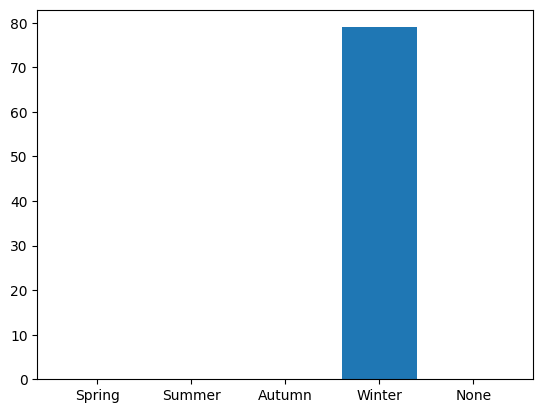

In [606]:
season_str = ['Spring', 'Summer', 'Autumn', 'Winter', 'None']

plt.bar(season_str, season_count)
plt.show()

# 이미지 파일과 json 파일을 한 리스트에 묶어서 저장

In [607]:
ori_file_list = []

for i in range(0, len(ori_img_list)):
    tmp_list = []

    tmp_list.append(ori_img_list[i])
    tmp_list.append(json_list[i])

    ori_file_list.append(tmp_list)

    if (i+1)%100 == 0: # 진행도 확인용
        print(str(i+1) + "개 리스트 저장 완료")

print()
print("Complete")


Complete


In [608]:
len(ori_file_list)

79

# 디렉토리에 저장

In [609]:
file_num = start_save_point - 1 # 밑에서 +1을 하고 시작하므로

for ori_file in ori_file_list:

    file_num = file_num + 1

    if (file_num%100) == 0: # 진행도 체크용
        print(str(file_num) + "번째 파일 작업중...")

    img_file_path = proc_img_dir_name + '/' + str(file_num) + ".jpg"
    json_file_path = proc_json_dir_name + '/' + str(file_num) + ".json"


    # 이미지 파일 저장
    success = cv2.imwrite(img_file_path, ori_file[0])
    if not success:
        print(str(file_num) + "번째 이미지 파일 저장 실패!")
        break

    # json 파일 저장
    with open(json_file_path, 'w') as outfile:
        json.dump(ori_file[1], outfile)

    success = os.path.isfile(json_file_path)
    if not success:
        print(str(file_num) + "번째 json 파일 저장 실패!")
        break


    # 좌우반전 이미지도 저장할 경우
    if flip_on:
      flip_img = cv2.flip(ori_file[0], 1) # 1은 좌우반전, 0은 상하반전
      file_num = file_num + 1

      if (file_num%100) == 0: # 진행도 체크용
        print(str(file_num) + "번째 파일 작업중...")

      img_file_path = proc_img_dir_name + '/' + str(file_num) + ".jpg"
      json_file_path = proc_json_dir_name + '/' + str(file_num) + ".json"

      # 이미지 파일 저장
      success = cv2.imwrite(img_file_path, flip_img)
      if not success:
        print("좌우반전된" + str(file_num) + "번째 이미지 파일 저장 실패!")
        break

      # json 파일 저장
      with open(json_file_path, 'w') as outfile:
        json.dump(ori_file[1], outfile)

      success = os.path.isfile(json_file_path)
      if not success:
        print("좌우반전된" + str(file_num) + "번째 json 파일 저장 실패!")
        break


    # 무사히 저장이 완료
    end_save_point = file_num



print()
print(str(end_save_point) + "번째 파일까지 파일 저장 성공!!")


2079번째 파일까지 파일 저장 성공!!


# 폴더를 확인하여 저장이 잘 되었는지 확인